In [1]:
import os
import tweepy as tw
import pandas as pd
from textblob import TextBlob
import re
import nltk
from nltk.tokenize import TweetTokenizer
import numpy as np
from nltk.corpus import stopwords
import string
from nltk import FreqDist
import seaborn as sns

import warnings

In [2]:
df=pd.read_csv('C:/Users/anshi/Desktop/143P/D2search_results_Harris.csv')
df

,user_country,source,content,date
0,Behind My Drums,Twitter Web App,Hey @JoeBiden and @KamalaHarris you got a vote...,2020-10-22T23:59:59+00:00
1,nyc's lower east side,Twitter for iPhone,Why *wouldn’t* you want to vote for Biden-Harr...,2020-10-22T23:59:58+00:00
2,NaN,Twitter for iPhone,@diegogrico @WellerWeller5 @KamalaHarris Shhh ...,2020-10-22T23:59:57+00:00
3,Australia,Twitter for iPhone,@KamalaHarris @MileyCyrus Jim Acosta - no need...,2020-10-22T23:59:55+00:00
4,U.S.,Twitter for iPhone,"Oh, my! Biden Crime Family has tentacles reach...",2020-10-22T23:59:54+00:00
...,...,...,...,...
1995,USA 220__,Twitter for Android,... anybody else think this Bobulinski revelat...,2020-10-22T23:32:25+00:00
1996,USA,Twitter for iPhone,@JoeBiden I’m a lifelong democrat. I voted for...,2020-10-22T23:32:25+00:00
1997,NaN,Twitter Web App,"@JoeBiden Nail the bum Joe, so he loses it and...",2020-10-22T23:32:25+00:00
1998,United States,Twitter Web App,WE HAVE SEEN TRUMP AND HIS ADMINISTRATON ALREA...,2020-10-22T23:32:24+00:00


In [3]:
tknzr = TweetTokenizer()

def tokenizer_tweets(df):
    
    text = ''
    for t in df['content']:
        text += t
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(df)
print(len(tokens))
print(tokens[:20])

52756
['hey', '@joebiden', 'and', '@kamalaharris', 'you', 'got', 'a', 'vote', 'in', 'california', '...', '#vote2020', '#votebidenharris', 'https://t.co/klybv7w4yfwhy', '*', 'wouldn', '’', 't', '*', 'you']


In [4]:
mean = np.mean([len(i) for i in df.content])

print("The lenght's average in tweets: %.2f%%" % mean)

The lenght's average in tweets: 150.55%


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 and (t[0].isalpha())]
    
    return tokens_cl

tokens_cl = clear_tokens(tokens)
print(len(tokens_cl))
print(tokens_cl[:20])

21280
['hey', 'got', 'vote', 'california', 'want', 'vote', 'biden-harris', 'wfp', 'line', 'especially', 'live', 'nys', 'shhh', 'mentioned', 'trump', 'good', 'get', 'program', 'orange', 'man']


In [7]:
def get_top20_of(i, n=20):
    return FreqDist([t for t in tokens if t.startswith(i)]).most_common(n)

In [8]:
get_top20_of('@')

[('@kamalaharris', 916),
 ('@joebiden', 608),
 ('@weinsteinlaw', 102),
 ('@realdonaldtrump', 95),
 ('@fred_guttenberg', 90),
 ('@barackobama', 81),
 ('@mileycyrus', 26),
 ('@jfnyc1', 23),
 ('@scottforflorida', 21),
 ('@speakerpelosi', 20),
 ('@cnn', 15),
 ('@potus', 14),
 ('@whitehouse', 14),
 ('@breitbartnews', 13),
 ('@thedemocrats', 11),
 ('@petebuttigieg', 11),
 ('@bretbaier', 11),
 ('@dnc', 11),
 ('@drbiden', 11),
 ('@markdice', 10)]

In [9]:
def clean_tweet(tweet):
    '''
    Function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    #Function to classify sentiments of passed tweets using TextBlob's sentiment method
    analysis = TextBlob(clean_tweet(tweet))
    #set sentiments
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [10]:
df['sentiment'] = [get_tweet_sentiment(t) for t in df.content]
df

,user_country,source,content,date,sentiment
0,Behind My Drums,Twitter Web App,Hey @JoeBiden and @KamalaHarris you got a vote...,2020-10-22T23:59:59+00:00,Neutral
1,nyc's lower east side,Twitter for iPhone,Why *wouldn’t* you want to vote for Biden-Harr...,2020-10-22T23:59:58+00:00,Positive
2,NaN,Twitter for iPhone,@diegogrico @WellerWeller5 @KamalaHarris Shhh ...,2020-10-22T23:59:57+00:00,Positive
3,Australia,Twitter for iPhone,@KamalaHarris @MileyCyrus Jim Acosta - no need...,2020-10-22T23:59:55+00:00,Positive
4,U.S.,Twitter for iPhone,"Oh, my! Biden Crime Family has tentacles reach...",2020-10-22T23:59:54+00:00,Positive
...,...,...,...,...,...
1995,USA 220__,Twitter for Android,... anybody else think this Bobulinski revelat...,2020-10-22T23:32:25+00:00,Neutral
1996,USA,Twitter for iPhone,@JoeBiden I’m a lifelong democrat. I voted for...,2020-10-22T23:32:25+00:00,Positive
1997,NaN,Twitter Web App,"@JoeBiden Nail the bum Joe, so he loses it and...",2020-10-22T23:32:25+00:00,Positive
1998,United States,Twitter Web App,WE HAVE SEEN TRUMP AND HIS ADMINISTRATON ALREA...,2020-10-22T23:32:24+00:00,Negative


In [11]:
df.sentiment.value_counts()

Positive    813
Neutral     810
Negative    377
Name: sentiment, dtype: int64

In [12]:
pos_tweets = df[(df.sentiment == 'Positive')] 
neu_tweets = df[(df.sentiment == 'Neutral')]                                                                   
neg_tweets = df[(df.sentiment == 'Negative')]  
                                                                        
print("Percentage of positive tweets: %.2f%%" %(len(pos_tweets)*100/len(df.sentiment)))
print("Percentage of neutral tweets: %.2f%%" %(len(neu_tweets)*100/len(df.sentiment)))
print("Percentage of negative tweets: %.2f%%" %(len(neg_tweets)*100/len(df.sentiment)))

Percentage of positive tweets: 40.65%
Percentage of neutral tweets: 40.50%
Percentage of negative tweets: 18.85%


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

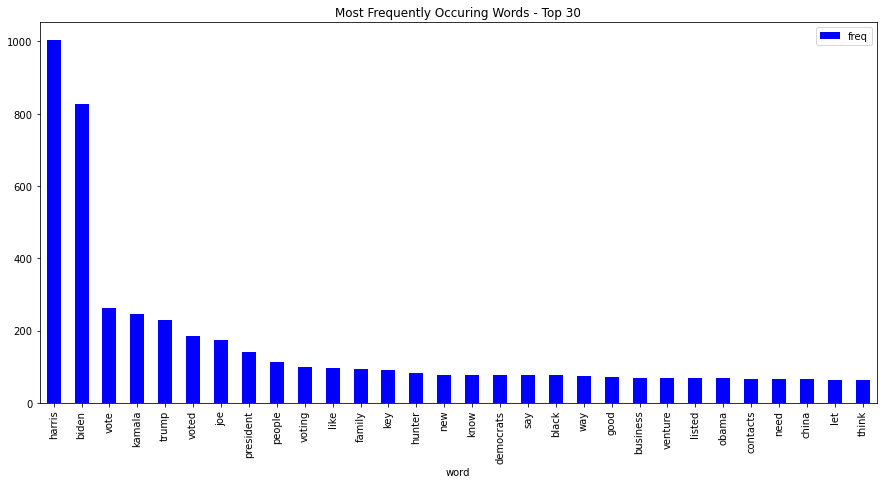

In [14]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tokens_cl)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Comments for Debate1')

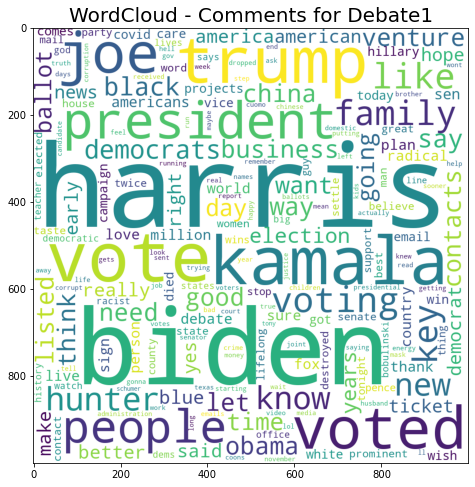

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Comments for Debate1", fontsize = 20)

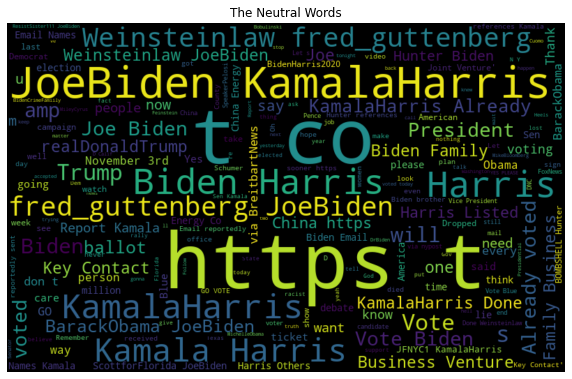

In [16]:
normal_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

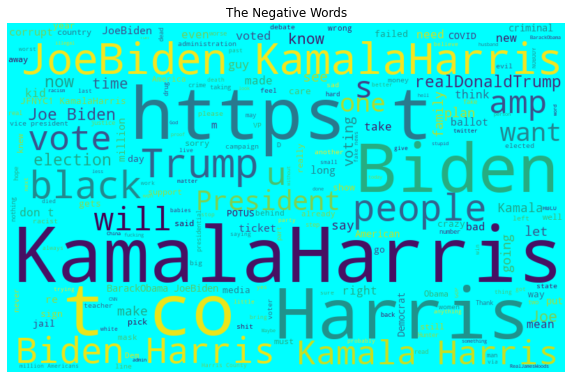

In [17]:
negative_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

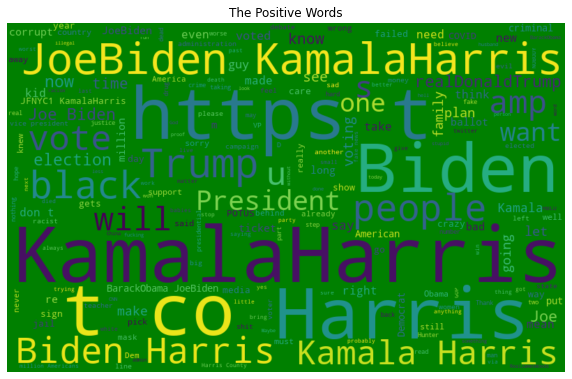

In [18]:
positive_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Positive']])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [19]:
df.drop(['user_country','source','date'],axis=1,inplace=True)
df

,content,sentiment
0,Hey @JoeBiden and @KamalaHarris you got a vote...,Neutral
1,Why *wouldn’t* you want to vote for Biden-Harr...,Positive
2,@diegogrico @WellerWeller5 @KamalaHarris Shhh ...,Positive
3,@KamalaHarris @MileyCyrus Jim Acosta - no need...,Positive
4,"Oh, my! Biden Crime Family has tentacles reach...",Positive
...,...,...
1995,... anybody else think this Bobulinski revelat...,Neutral
1996,@JoeBiden I’m a lifelong democrat. I voted for...,Positive
1997,"@JoeBiden Nail the bum Joe, so he loses it and...",Positive
1998,WE HAVE SEEN TRUMP AND HIS ADMINISTRATON ALREA...,Negative


In [20]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [21]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [22]:
testing = df.content[:2000]

In [23]:
from bs4 import BeautifulSoup

In [24]:

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [25]:
Cleaned_data= {'sentiment':df['sentiment'], 
        'content':test_result} 

In [26]:
data=pd.DataFrame(Cleaned_data)
data

,sentiment,content
0,Neutral,hey and you got a vote in california vote vote...
1,Positive,why wouldn t you want to vote for biden harris...
2,Positive,shhh don t mentioned that trump did good get w...
3,Positive,jim acosta no need for plexiglass between and ...
4,Positive,oh my biden crime family has tentacles reachin...
...,...,...
1995,Neutral,anybody else think this bobulinski revelation ...
1996,Positive,i m a lifelong democrat i voted for obama twic...
1997,Positive,nail the bum joe so he loses it and goes full ...
1998,Negative,we have seen trump and his administraton alrea...


In [27]:
df1=data[data.sentiment == 'Positive']

In [28]:
df2=data[data.sentiment == 'Negative']

In [29]:
df3=df1.append(df2) 
df3

,sentiment,content
1,Positive,why wouldn t you want to vote for biden harris...
2,Positive,shhh don t mentioned that trump did good get w...
3,Positive,jim acosta no need for plexiglass between and ...
4,Positive,oh my biden crime family has tentacles reachin...
7,Positive,citizen are you throwing your ballot in the ga...
...,...,...
1980,Negative,fakenews by fake aka donthecon check edit mike...
1982,Negative,pls don t be so stupid they were deported with...
1989,Negative,is as dirty as take them all down
1990,Negative,the biden s are dishonest old school political...


In [30]:
df3=df3.replace('Positive',1).replace('Negative',0)

In [31]:
df3

,sentiment,content
1,1,why wouldn t you want to vote for biden harris...
2,1,shhh don t mentioned that trump did good get w...
3,1,jim acosta no need for plexiglass between and ...
4,1,oh my biden crime family has tentacles reachin...
7,1,citizen are you throwing your ballot in the ga...
...,...,...
1980,0,fakenews by fake aka donthecon check edit mike...
1982,0,pls don t be so stupid they were deported with...
1989,0,is as dirty as take them all down
1990,0,the biden s are dishonest old school political...


In [32]:
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer

In [33]:
train, test = train_test_split(df3, test_size=0.25, random_state=42)
print(train.shape)
print(test.shape)

(892, 2)
(298, 2)


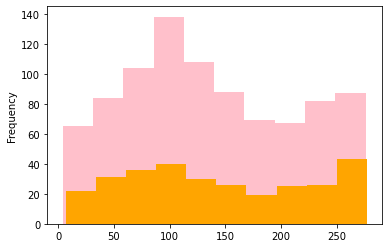

In [34]:
length_train = train['content'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['content'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [35]:
tokenized_tweet = train['content'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['content']), epochs=20)

(293610, 457400)

In [36]:
model_w2v.wv.most_similar(positive = "trump")

[('travel', 0.7783012986183167),
 ('negative', 0.7677652835845947),
 ('testing', 0.7577150464057922),
 ('water', 0.7531523704528809),
 ('pandemic', 0.7447302341461182),
 ('presidentialdebate', 0.7436987161636353),
 ('north', 0.7391310334205627),
 ('walkaway', 0.7387477159500122),
 ('claims', 0.7299127578735352),
 ('american', 0.7280244827270508)]

In [37]:
model_w2v.wv.most_similar(negative = "trum")

[('email', -0.2086625099182129),
 ('ballot', -0.2231927216053009),
 ('alleged', -0.23007895052433014),
 ('blue', -0.23302078247070312),
 ('exchange', -0.24164718389511108),
 ('top', -0.24372901022434235),
 ('county', -0.24541230499744415),
 ('bidenharris', -0.24836650490760803),
 ('domestic', -0.2511715888977051),
 ('democrats', -0.25749677419662476)]

In [38]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow.keras as keras


In [39]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
Tr=train["content"].values.tolist()
Te=test["content"].values.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
x_train = cv.fit_transform(Tr).toarray()
y_train = train.iloc[:, 0]
y_test=test.iloc[:,0]
print(x_train.shape)
print(y_train.shape)

cv = CountVectorizer(max_features = 500)
x_test = cv.fit_transform(Te).toarray()

print(x_test.shape)

(892, 500)
(892,)
(298, 500)


In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9988789237668162
Validation Accuracy : 0.45302013422818793
F1 score : 0.4724919093851133
[[ 62  23]
 [140  73]]


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9943946188340808
Validation Accuracy : 0.5201342281879194
f1 score : 0.6379746835443038
[[ 29  56]
 [ 87 126]]


In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9988789237668162
Validation Accuracy : 0.4597315436241611
f1 score : 0.46153846153846145
[[ 68  17]
 [144  69]]


In [46]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9338565022421524
Validation Accuracy : 0.7248322147651006
f1 score : 0.8353413654618475
[[  8  77]
 [  5 208]]


In [47]:
imdb_tokenizer = Tokenizer(num_words=500)
imdb_tokenizer.fit_on_texts(train['content'].values)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(train['content'].values)
x_val_seq = imdb_tokenizer.texts_to_sequences(test['content'].values)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = train['sentiment'].values, test['sentiment'].values

print('First sample before preprocessing: \n', train['content'].values[0], '\n')
print('First sample after preprocessing: \n', x_train[0])

First sample before preprocessing: 
 oh nooo hope that man trump don t copy lol yayyyyy vote 

First sample after preprocessing: 
 [226 139  14 190  22  59  18 257  19   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

In [48]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [49]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 40)           1200000   
_________________________________________________________________
dropout (Dropout)            (None, 500, 40)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250) 

In [50]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
7/7 - 1s - loss: 0.6548 - accuracy: 0.6646 - val_loss: 0.6228 - val_accuracy: 0.6778
Epoch 2/20
7/7 - 1s - loss: 0.6370 - accuracy: 0.6721 - val_loss: 0.6157 - val_accuracy: 0.6778
Epoch 3/20
7/7 - 1s - loss: 0.6290 - accuracy: 0.6721 - val_loss: 0.6160 - val_accuracy: 0.6778
Epoch 4/20
7/7 - 1s - loss: 0.6209 - accuracy: 0.6721 - val_loss: 0.6083 - val_accuracy: 0.6778
Epoch 5/20
7/7 - 1s - loss: 0.6113 - accuracy: 0.6721 - val_loss: 0.5958 - val_accuracy: 0.6778
Epoch 6/20
7/7 - 1s - loss: 0.5996 - accuracy: 0.6721 - val_loss: 0.5856 - val_accuracy: 0.6778
Epoch 7/20
7/7 - 1s - loss: 0.5797 - accuracy: 0.6721 - val_loss: 0.5656 - val_accuracy: 0.6778
Epoch 8/20
7/7 - 1s - loss: 0.5535 - accuracy: 0.6721 - val_loss: 0.5393 - val_accuracy: 0.6778
Epoch 9/20
7/7 - 1s - loss: 0.5165 - accuracy: 0.6733 - val_loss: 0.5043 - val_accuracy: 0.7222
Epoch 10/20
7/7 - 1s - loss: 0.4660 - accuracy: 0.7369 - val_loss: 0.4747 - val_accuracy: 0.7333
Epoch 11/20
7/7 - 1s - loss: 0.4200 - a

In [51]:
df4=data.replace('Positive',1).replace('Negative',0).replace('Neutral',-1)
df4

,sentiment,content
0,-1,hey and you got a vote in california vote vote...
1,1,why wouldn t you want to vote for biden harris...
2,1,shhh don t mentioned that trump did good get w...
3,1,jim acosta no need for plexiglass between and ...
4,1,oh my biden crime family has tentacles reachin...
...,...,...
1995,-1,anybody else think this bobulinski revelation ...
1996,1,i m a lifelong democrat i voted for obama twic...
1997,1,nail the bum joe so he loses it and goes full ...
1998,0,we have seen trump and his administraton alrea...


In [52]:
X=df4['content']
Y=df4['sentiment']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [53]:
TR=X_train.tolist()
TE=X_valid.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
X_Train = cv.fit_transform(TR).toarray()
Y1 = Y_train
Y_test=Y_valid
print(X_Train.shape)
print(Y1.shape)

cv = CountVectorizer(max_features = 500)
X_test = cv.fit_transform(TE).toarray()

print(X_test.shape)

(1500, 500)
(1500,)
(500, 500)


In [54]:
print(X_Train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_valid.shape)

(1500, 500)
(500, 500)
(1500,)
(500,)


In [55]:
model = RandomForestClassifier()
model.fit(X_Train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(Y_valid, Y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_valid, Y_pred)
print(cm)

Training Accuracy : 0.9946666666666667
Validation Accuracy : 0.478
F1 score : [0.51412429 0.10526316 0.56680162]
[[ 91  22  76]
 [ 25   8  62]
 [ 49  27 140]]


In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9166666666666666
Validation Accuracy : 0.412
f1 score : [0.54094293 0.19298246 0.40650407]
[[109  39  41]
 [ 36  22  37]
 [ 69  72  75]]


In [57]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9946666666666667
Validation Accuracy : 0.47
f1 score : [0.43729904 0.33187773 0.56086957]
[[ 68  44  77]
 [ 19  38  38]
 [ 35  52 129]]


In [58]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.8606666666666667
Validation Accuracy : 0.576
f1 score : [0.64267352 0.         0.63178295]
[[125   0  64]
 [ 22   0  73]
 [ 53   0 163]]


In [59]:
X_Train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
imdb_tokenizer = Tokenizer(num_words=500)
TRain=pd.DataFrame(X_Train)
TEst=pd.DataFrame(X_test)
YTrain=pd.DataFrame(Y_train)
YTest=pd.DataFrame(Y_test)
imdb_tokenizer.fit_on_texts(TR)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(TR)
x_val_seq = imdb_tokenizer.texts_to_sequences(TE)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = YTrain['sentiment'].values, YTest['sentiment'].values

print('First sample before preprocessing: \n', TR, '\n')
print('First sample after preprocessing: \n', X_Train[0])

First sample before preprocessing: 
 ['we already have several crookedbiden gaff montages pretty soon harris montages will be circulating are these two the best the dems could find just wow', 'this may go down as not only one of the biggest political scandals of all time but one of the biggest mainstream media cover ups of all time fox news hunter biden business associate s text messages indicate meeting with joe biden how say you kamala harris', 'let s go joe teamjoe bidenharris', 'i got a new biden harris shirt that i will be wearing tonight it s going to be a wild ride', 'we are skilled immigrants not a nation equality now beijing must be happy now that you have blocked s s is one of the most bipartisan immigration bills in congress rickbeijingscott unblocks', 'i like your biden harris header i m following u and i hope unwilling follow me on my page u will find over memes against trump and for joe i m sending u one of my animated pictures', 'note the forecast going into the second p

In [61]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [62]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 40)           1200000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 40)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250

In [63]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
11/11 - 2s - loss: 0.4617 - accuracy: 0.2037 - val_loss: 0.2610 - val_accuracy: 0.1933
Epoch 2/20
11/11 - 2s - loss: -4.5331e-02 - accuracy: 0.1874 - val_loss: 0.1052 - val_accuracy: 0.1933
Epoch 3/20
11/11 - 2s - loss: -1.5903e-01 - accuracy: 0.1874 - val_loss: 0.1716 - val_accuracy: 0.1933
Epoch 4/20
11/11 - 2s - loss: -2.3351e-01 - accuracy: 0.1874 - val_loss: 0.1963 - val_accuracy: 0.1933
Epoch 5/20
11/11 - 2s - loss: -3.3180e-01 - accuracy: 0.1874 - val_loss: 0.1977 - val_accuracy: 0.1933
Epoch 6/20
11/11 - 2s - loss: -5.9774e-01 - accuracy: 0.1874 - val_loss: 0.0092 - val_accuracy: 0.1933
Epoch 7/20
11/11 - 2s - loss: -1.1811e+00 - accuracy: 0.1874 - val_loss: -8.1440e-01 - val_accuracy: 0.1933
Epoch 8/20
11/11 - 2s - loss: -2.7999e+00 - accuracy: 0.1874 - val_loss: -2.7730e+00 - val_accuracy: 0.1933
Epoch 9/20
11/11 - 2s - loss: -7.0731e+00 - accuracy: 0.1874 - val_loss: -7.3272e+00 - val_accuracy: 0.2000
Epoch 10/20
11/11 - 2s - loss: -1.5136e+01 - accuracy: 0.1978 -